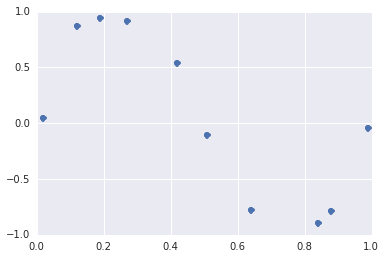

In [27]:
%matplotlib inline
import numpy as np
import pylab as plt
import seaborn as sns
X = np.array([0.02, 0.12, 0.19, 0.27, 0.42, 0.51, 0.64, 0.84, 0.88, 0.99])
t = np.array([0.05, 0.87, 0.94, 0.92, 0.54, -0.11, -0.78, -0.89, -0.79, -0.04])
plt.plot(X, t, 'o')

多項式基底による線形回帰モデルの定義

In [9]:
def phi(x):
    return [1, x, x**2, x**3]

In [11]:
PHI = np.array([phi(x) for x in X])
print(PHI)

[[  1.00000000e+00   2.00000000e-02   4.00000000e-04   8.00000000e-06]
 [  1.00000000e+00   1.20000000e-01   1.44000000e-02   1.72800000e-03]
 [  1.00000000e+00   1.90000000e-01   3.61000000e-02   6.85900000e-03]
 [  1.00000000e+00   2.70000000e-01   7.29000000e-02   1.96830000e-02]
 [  1.00000000e+00   4.20000000e-01   1.76400000e-01   7.40880000e-02]
 [  1.00000000e+00   5.10000000e-01   2.60100000e-01   1.32651000e-01]
 [  1.00000000e+00   6.40000000e-01   4.09600000e-01   2.62144000e-01]
 [  1.00000000e+00   8.40000000e-01   7.05600000e-01   5.92704000e-01]
 [  1.00000000e+00   8.80000000e-01   7.74400000e-01   6.81472000e-01]
 [  1.00000000e+00   9.90000000e-01   9.80100000e-01   9.70299000e-01]]


重みを求める。

In [20]:
w = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T, PHI)), PHI.T), t)
w

array([ -0.1445875 ,  11.58956694, -33.87843698,  22.54195201])

solve()を使って重みを求めることも可能。

In [19]:
w = np.linalg.solve(np.dot(PHI.T, PHI), np.dot(PHI.T, t)) 
w

array([ -0.1445875 ,  11.58956694, -33.87843698,  22.54195201])

図示して確かめてみる。

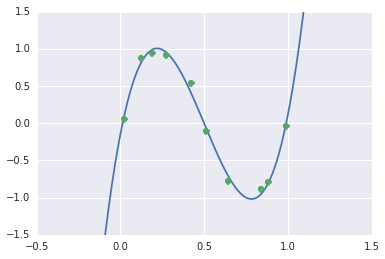

In [82]:
def linear_reg(X, t, phi):
    PHI = np.array([phi(x) for x in X])
    w = np.linalg.solve(np.dot(PHI.T, PHI), np.dot(PHI.T, t)) 
    xlist = np.arange(-.5, 1.5, 0.01)
    ylist = [np.dot(w, phi(x)) for x in xlist]
    plt.plot(xlist, ylist)
    plt.plot(X, t, 'o')
    plt.ylim(-1.5, 1.5)
linear_reg(X, t, phi)

基底関数の次元数を増やしてみる。過学習ぎみ？

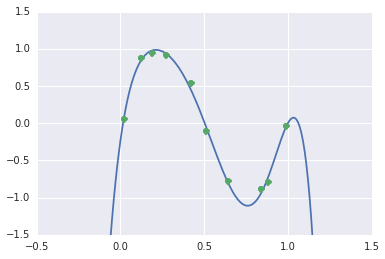

In [83]:
def phi2(x): 
    return [x**i for i in range(7)]
linear_reg(X, t, phi2)

ガウス基底も試してみる。

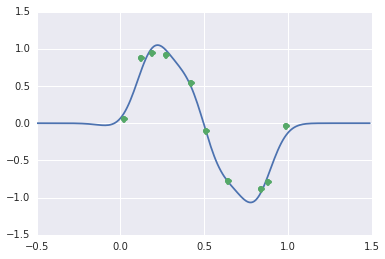

In [104]:
import math
def phi3(x): 
    s = 0.1
    mus = np.arange(0, 1, 0.2)
    return [math.exp(- (x - mu)**2 / (2 * s * s)) for mu in mus]
linear_reg(X, t, phi3)

正則化項の導入

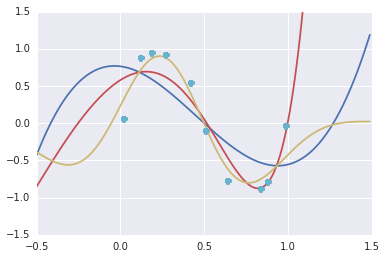

In [103]:
def linear_reg_norm(X, t, phi):
    lambd = 0.01
    PHI = np.array([phi(x) for x in X])
    w = np.linalg.solve((lambd * np.identity(PHI.shape[1])) + np.dot(PHI.T, PHI), np.dot(PHI.T, t)) 
    xlist = np.arange(-.5, 1.5, 0.01)
    ylist = [np.dot(w, phi(x)) for x in xlist]
    plt.plot(xlist, ylist)
    plt.plot(X, t, 'o')
    plt.ylim(-1.5, 1.5)
linear_reg_norm(X, t, phi)
linear_reg_norm(X, t, phi2)
linear_reg_norm(X, t, phi3)